In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# 1.  Loading the dataset and get the basic details

In [2]:
data = pd.read_csv('/Users/nidhi.anil/Downloads/car_age_price.csv')

In [3]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [4]:
data.shape

(112, 2)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [8]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# 2. Data Cleaning

# Handling missing values in the dataset

In [9]:
data.isna().sum()

Year     0
Price    0
dtype: int64

# Detecting Outliers

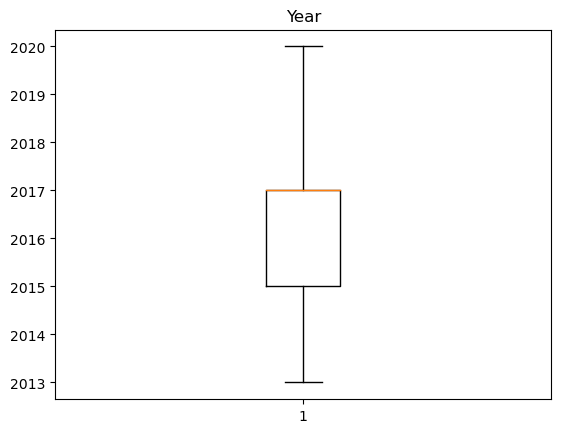

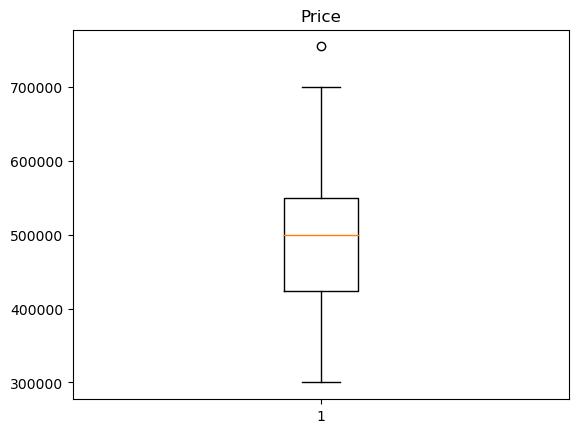

In [10]:
col = ['Year','Price']
for i in col:
    plt.figure()
    plt.boxplot(data[i])
    plt.title(i)

# 3. Visualisation of Data

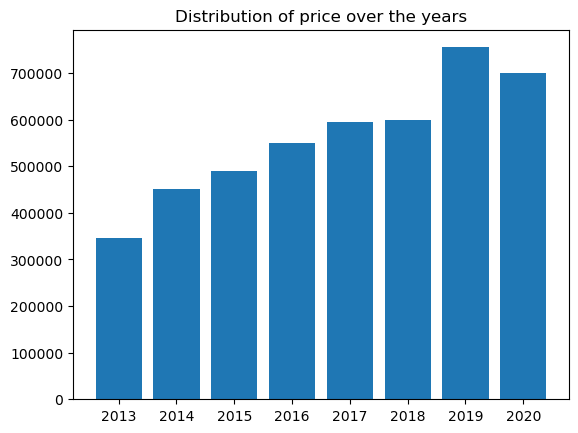

In [11]:
plt.bar(data['Year'],data['Price'])
plt.title('Distribution of price over the years')
plt.show()

# 4. Creating the Model

<Axes: >

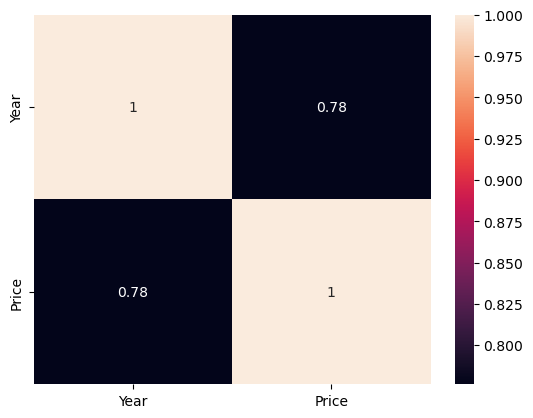

In [12]:
corr_matrix = data.corr()
sns.heatmap(corr_matrix,annot=True)

# Creating Linear Regression Model

In [15]:
x = data.drop(['Price'],axis=1) #Independant variable
y = data['Price'] #Dependant variable

# Splitting the data for training and testing 

In [16]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [17]:
x_train,x_test

(     Year
 81   2014
 77   2015
 15   2017
 30   2019
 45   2018
 ..    ...
 106  2015
 14   2017
 92   2017
 51   2018
 102  2015
 
 [84 rows x 1 columns],
      Year
 40   2019
 65   2017
 4    2018
 47   2018
 42   2018
 69   2015
 26   2017
 11   2018
 10   2019
 44   2019
 73   2013
 55   2017
 68   2015
 97   2020
 0    2018
 18   2019
 53   2013
 80   2015
 103  2017
 91   2017
 36   2017
 12   2017
 31   2017
 66   2017
 90   2017
 62   2017
 22   2015
 85   2015)

In [18]:
y_train,y_test

(81     390000
 77     325000
 15     500000
 30     650000
 45     450000
         ...  
 106    300000
 14     475000
 92     520000
 51     550000
 102    350000
 Name: Price, Length: 84, dtype: int64,
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

In [20]:
LR = LinearRegression()    

In [21]:
linear_model = LR.fit(x_train,y_train)

In [22]:
y_pred = linear_model.predict(x_test)   #predicting the car price using x_test values

In [23]:
y_pred,y_test

(array([599223.07304104, 505265.04214995, 552244.05759549, 552244.05759549,
        552244.05759549, 411307.01125886, 505265.04214995, 552244.05759549,
        599223.07304104, 599223.07304104, 317348.98036776, 505265.04214995,
        411307.01125886, 646202.08848657, 552244.05759549, 599223.07304104,
        317348.98036776, 411307.01125886, 505265.04214995, 505265.04214995,
        505265.04214995, 505265.04214995, 505265.04214995, 505265.04214995,
        505265.04214995, 505265.04214995, 411307.01125886, 411307.01125886]),
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

# Calculating model efficiency

In [27]:
from sklearn.metrics import mean_squared_error,r2_score


In [28]:
linear_MSE = mean_squared_error(y_test,y_pred)
linear_R2 = r2_score(y_test,y_pred)

In [29]:
print(linear_MSE)
print(linear_R2)

3878767151.073449
0.4347961632108023


In [30]:
# import lasso regression from sklearn library
from sklearn.linear_model import Lasso

In [31]:
# Training the model
lasso = Lasso(alpha = 0.01)
lasso_model = lasso.fit(x_train,y_train)
y_pred1 = lasso_model.predict(x_test)

In [32]:
y_pred1,y_test

(array([599223.0633935 , 505265.04048657, 552244.05194004, 552244.05194004,
        552244.05194004, 411307.01757963, 505265.04048657, 552244.05194004,
        599223.0633935 , 599223.0633935 , 317348.9946727 , 505265.04048657,
        411307.01757963, 646202.07484697, 552244.05194004, 599223.0633935 ,
        317348.9946727 , 411307.01757963, 505265.04048657, 505265.04048657,
        505265.04048657, 505265.04048657, 505265.04048657, 505265.04048657,
        505265.04048657, 505265.04048657, 411307.01757963, 411307.01757963]),
 40     525000
 65     495000
 4      465000
 47     450000
 42     550000
 69     300000
 26     550000
 11     500000
 10     500000
 44     550000
 73     320000
 55     550000
 68     465000
 97     640000
 0      465000
 18     500000
 53     345000
 80     390000
 103    375000
 91     520000
 36     550000
 12     500000
 31     550000
 66     525000
 90     520000
 62     540000
 22     434999
 85     320000
 Name: Price, dtype: int64)

In [33]:

lasso_MSE = mean_squared_error(y_test,y_pred1)
lasso_R2 = r2_score(y_test,y_pred1)

In [34]:
print(lasso_MSE)
print(lasso_R2)

3878766838.5196795
0.43479620875532277


# Selection of best model

In [36]:
if linear_MSE<lasso_MSE and linear_R2>lasso_R2:
    selected_model=linear_model
    print('Best model : Linear Regression Model')
elif lasso_MSE<linear_MSE and lasso_R2>linear_R2:
    selected_model=lasso_model
    print('Best model : Lasso Regression Model')
else:
    print('Both models have similar performance')

Best model : Lasso Regression Model


# Predict the possible price of a 2022 model second-hand grand i10 using Lasso Regression Model

In [37]:
price = lasso_model.predict([[2022]])

/Users/nidhi.anil/anaconda3/lib/python3.10/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [39]:
print('The possible price of a 2022 model second-hand grand i10 car is',price)

The possible price of a 2022 model second-hand grand i10 car is [740160.0977539]
